# Simulation of the field measured by a sensor with finite effective area

This notebook illustrates the field that would be measured on a ferromanganese marine crust sample similar to that one presented by Oda et al. (2011).

* Oda, H., Usui, A., Miyagi, I., Joshima, M., Weiss, B. P., Shantz, C., Fong, L. E., McBride, K. K., Harder, R. and Baudenbacher, F. J. **Ultrafine-scale magnetostratigraphy of marine ferromanganese crust**. Geology, March 2011; v. 39; no. 3; p. 227–230; doi: [10.1130/G31610.1](http://dx.doi.org/10.1130/G31610.1) 

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from IPython.display import Image
from fatiando import mesher, gridder, utils
from fatiando.gravmag import prism, sphere, polyprism
from fatiando.utils import ang2vec, vec2ang
from fatiando.vis import mpl, myv
from fatiando.constants import CM, T2NT

In [3]:
mpl.rc('font', size=14)

In [4]:
import functions as f

### Intensity data

The intensity data presented below were digitized from Figure 1G presented by Oda et al. (2011).

In [5]:
intensity = np.array([[  2.03610194,  14.33948864],
                      [  4.23953444,  14.53125   ],
                      [  5.66110379,   4.43181818],
                      [  6.94051621,   3.28125   ],
                      [  8.64639943,   5.58238636],
                      [ 10.21012572,   4.30397727],
                      [ 11.70277354,   7.62784091],
                      [ 12.98218596,   4.6875    ],
                      [ 14.54591225,   2.19460227],
                      [ 16.10963854,   1.55539773],
                      [ 17.46012942,   6.66903409],
                      [ 19.94787579,   2.32244318],
                      [ 21.36944514,   1.36363636],
                      [ 22.86209296,   1.55539773],
                      [ 24.35474079,   2.64204545],
                      [ 26.13170248,   3.34517045],
                      [ 27.55327183,   3.28125   ],
                      [ 28.83268425,   2.06676136],
                      [ 30.32533207,   1.55539773],
                      [ 31.74690142,   2.76988636],
                      [ 33.45278465,   3.28125   ],
                      [ 34.94543247,   3.21732955],
                      [ 36.43808029,   3.47301136],
                      [ 37.71749271,   1.81107955]])
k = 10**(-3)
m = k*intensity[:,1]

### Declination data

The declination data presented below were digitized from Figure 1D presented by Oda et al. (2011).

In [6]:
declination = np.array([[   1.72796617,   55.22727273],
              [   4.04803263,   61.36363636],
              [   5.57057624,  174.88636364],
              [   7.16562193, -108.92045455],
              [   8.68816555, -110.45454545],
              [   9.92070085, -116.59090909],
              [  11.44324447, -119.65909091],
              [  13.03829016,   65.96590909],
              [  14.41582962, -125.79545455],
              [  15.93837323, -139.60227273],
              [  17.38841477,  162.61363636],
              [  19.99848954, -104.31818182],
              [  21.44853108,  -81.30681818],
              [  22.97107469, -104.31818182],
              [  24.63862246, -105.85227273],
              [  25.79865569,  -98.18181818],
              [  27.24869723,   50.625     ],
              [  28.84374292, -145.73863636],
              [  30.36628653,    4.60227273],
              [  31.96133223, -124.26136364],
              [  33.41137376,   95.11363636],
              [  34.93391738,  -26.07954545],
              [  36.45646099,  -33.75      ],
              [  37.47149007,  -52.15909091]])

dec = declination[:,1]

### Inclination data

The inclination data presented below were digitized from Figure 1E presented by Oda et al. (2011).

In [7]:
inclination = np.array([[  1.81435669,  48.32386364],
              [  4.24941436,  52.92613636],
              [  5.75342057,  -7.67045455],
              [  7.32904612, -46.78977273],
              [  8.68981364, -46.02272727],
              [ 10.19381985, -47.55681818],
              [ 11.7694454,  -46.78977273],
              [ 13.05859358,  48.32386364],
              [ 14.63421913,  -0.76704545],
              [ 16.13822533,  39.11931818],
              [ 17.49899285, -12.27272727],
              [ 20.14890855, -23.77840909],
              [ 21.58129541, -28.38068182],
              [ 23.01368228, -36.05113636],
              [ 24.58930783, -46.78977273],
              [ 26.16493338, -39.88636364],
              [ 27.45408156,  52.15909091],
              [ 29.02970711, -52.15909091],
              [ 30.46209397, -59.82954545],
              [ 32.10933886, -52.15909091],
              [ 33.47010638,  60.59659091],
              [ 34.90249325,  73.63636364],
              [ 36.33488011,  11.50568182],
              [ 37.69564763, -23.01136364]])

inc = inclination[:,1]

### Synthetic sample 

The sinthetic sample simulated here is formed by 24 juxtaposed cells whose length sides are 1.5, 5.0 and 5.0 mm along the $x$, $y$ and $z$ directions, respectively. The magnetization intensity, declination and inclination values of each cell are those ones digitized from Figure 1 of Oda et al. (2011). The magnetic induction produced by this synthetic sample is calculated on four planes around the sample, at a regular grid of 200 x 100 observation points, being 200 the number of points along the $x$-axis. The distance between the planes and sample surface is 370 $\mu$m.

In [8]:
Lx = 1.5  #cell length side along x-axis in mm
Ly = 5.0  #sample length side along y-axis in mm
Lz = 5.0  #sample length side along z-axis in mm
N = 24    #number of cells forming the synthetic sample
Nx = 200  #number of points along the x-axis on the planes
Ny = 100  #number of points along the y- or z-axis on the planes
xmax = 0.001*25
ymax = 0.001*12.5
zmax = 0.001*12.5
xmin = -xmax
ymin = -ymax
zmin = -zmax
area = [xmin,xmax,ymin,ymax]
volume = area + [zmax,zmin]

In [9]:
print 'Total sample length along the x-axis: %.3f mm' % (N*Lx)

Total sample length along the x-axis: 36.000 mm


#### Syntetic sample model

In [10]:
model_crust = f.sample(0.001*Lx,0.001*Ly,0.001*Lz,N,m,inc,dec)

In [11]:
## Strongly magnetized dipoles within the synthetic sample

mag_grains,Cx,Cy,Cz = f.dipolesrand(N,40,20,0,90,90,100,
                                    0.000001*30,0.001*Lx,0.001*Ly,0.001*Lz)

#### Magnetic induction produced by the synthetic sample

In [12]:
h1 = 10   #distance (in microns) between the planes and the sample surface
h2 = 100   #distance (in microns) between the planes and the sample surface
h3 = 300   #distance (in microns) between the planes and the sample surface

h = [h1,h2,h3]

In [29]:
Bp = []
Ba = []
for i in range(3):
    x0,y0,z0 = f.coordplane(h[i],Ly,Nx,Ny,area,0,0)
    # Magnetic data measured by a infinitesimal sensor
    Bp.append(f.magnetic_data(x0, y0, z0, model_crust, 0, grains = mag_grains))
    # Magnetic data measured by a finite sensor
    Ba.append(f.magnetic_data(x0, y0, z0, model_crust, 0, (500.,500.), grains = mag_grains))

With the observation points and the synthetic model generated previously, we calculate the magnetic induction produced by the synthetic sample on the four planes.

### Plotting of the observed and theoretical data

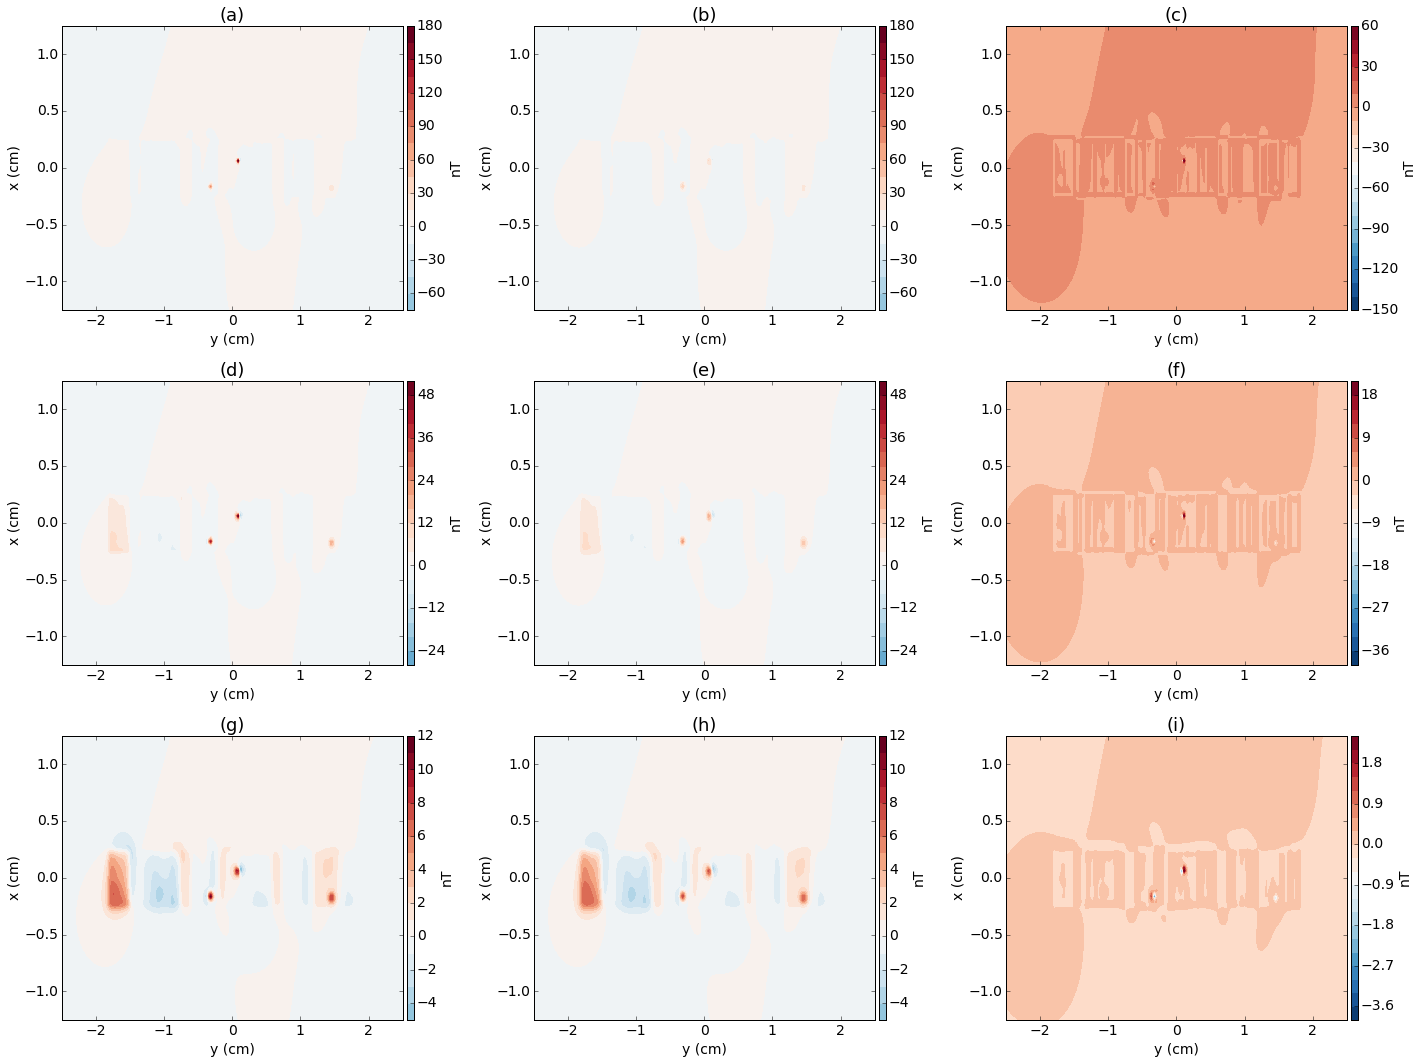

In [30]:
title_font = 18
bottom_font = 16
shape = (200,100)

labels = ['(a)', '(b)', '(c)',
          '(d)', '(e)', '(f)',
          '(g)', '(h)', '(i)']

mpl.close('all')
mpl.figure(figsize=(20,15), tight_layout=True)

for i in range(3):

    mpl.subplot(3,3,1+3*i)

    ranges = np.max(np.abs([Bp[i].max(), Bp[i].min(),
                            Ba[i].max(),Ba[i].min()]))

    mpl.title(labels[3*i], fontsize=title_font)
    nlevels = mpl.contourf(100.*x0, 100.*y0, Bp[i], shape, 20, cmap=mpl.cm.RdBu_r,
                vmin=-ranges, vmax=ranges)
    mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
    mpl.xlabel('y (cm)')
    mpl.ylabel('x (cm)')

    mpl.subplot(3,3,1+3*i+1)

    mpl.title(labels[3*i+1], fontsize=title_font)
    mpl.contourf(100.*x0, 100.*y0, Ba[i], shape, nlevels, cmap=mpl.cm.RdBu_r,
                vmin=-ranges, vmax=ranges)
    mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
    mpl.xlabel('y (cm)')
    mpl.ylabel('x (cm)')

    mpl.subplot(3,3,1+3*i+2)
    mpl.title(labels[3*i+2], fontsize=title_font)
    mpl.contourf(100.*x0, 100.*y0, Ba[i] - Bp[i], shape, 20, cmap=mpl.cm.RdBu_r)
    mpl.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
    mpl.xlabel('y (cm)')
    mpl.ylabel('x (cm)')

mpl.savefig('comp_punctual_averaged_500x500.png')
mpl.show()

** Figure 1:** (a), (d) and (g) Magnetic data that would be measured by an infinitesimal sensor. (b), (e) and (h) Magnetic data that would be measured by a finite sensor with effective area 3 $\mu$m $\times$ 3 $\mu$m. The data shown in (a) and (b) are located at a distance $h$ = 10 $\mu$m, the data shown in (d) and (e) are located at a distance $h$ = 300 $\mu$m and the data shown in (g) and (h) are located at a distance $h$ = 300 $\mu$m.  (c), (f) and (i) Difference between the data that would be measured by a finite and an infinitesimal sensor at the same $h$. All values are in nT.

### Conclusions